In [2]:
import tradingeconomics as te
import pandas as pd
import matplotlib.pyplot as plt

In [48]:
te.login(); # Signup for a free API key at https://developer.tradingeconomics.com/

In [7]:
# Get commodities data
data = te.getMarketsData(marketsField = 'commodities', output_type = 'df')
data

Symbol Ticker               Name    Country                 Date  \
0     CL1:COM    CL1          Crude Oil  commodity  2022-07-20T18:29:00   
1     CO1:COM   COG1              Brent  commodity  2022-07-20T20:15:00   
2     NG1:COM    NG1        Natural gas  commodity  2022-07-20T20:14:00   
3     XB1:COM    XB1           Gasoline  commodity  2022-07-20T20:14:00   
4     HO1:COM    HO1        Heating Oil  commodity  2022-07-20T20:14:00   
..        ...    ...                ...        ...                  ...   
82    DCE:COM    DCE            Eggs CH  Commodity  2022-07-20T00:00:00   
83  EECXM:IND  EECXM  EU Carbon Permits  commodity  2022-07-20T15:59:00   
84   FABT:COM   FABT             Butter  Commodity  2022-07-20T00:00:00   
85   FAPP:COM   FAPP           Potatoes  Commodity  2022-07-20T00:00:00   
86    C 1:COM    C A               Corn  commodity  2022-07-20T18:19:00   

         State       Last      Close            CloseDate         Group  ...  \
0   OPEN         102.2600   102.2600  2022-07-20T00:00:00        Energy  ...   
1   OPEN         106.7000   106.7000  2022-07-20T20:15:00        Energy  ...   
2   OPEN           7.8960     7.8960  2022-07-20T20:14:00        Energy  ...   
3   OPEN           3.2541     3.2541  2022-07-20T20:14:00        Energy  ...   
4   OPEN           3.6007     3.6007  2022-07-20T20:14:00        Energy  ...   
..         ...        ...        ...                  ...           ...  ...   
82  CLOSED      4500.0000  4500.0000  2022-07-20T00:00:00     Livestock  ...   
83  OPEN          78.8400    78.8400  2022-07-20T00:00:00         Index  ...   
84  CLOSED      7200.0000  7200.0000  2022-07-20T00:00:00  Agricultural  ...   
85  CLOSED        17.2000    17.2000  2022-07-20T00:00:00  Agricultural  ...   
86  OPEN         592.2500   592.2500  2022-07-20T00:00:00  Agricultural  ...   

    yesterday   lastWeek  lastMonth   lastYear  startYear  decimals  \
0    104.2200    96.3000   109.5200    70.3000    74.8800       3.0   
1    107.3500    99.5700   111.7700    72.2300    77.3500       2.0   
2      7.2640     6.6890     6.7830     3.9590     3.7300       4.0   
3      3.3075     3.2337     3.6953     2.2167     2.2286       4.0   
4      3.6268     3.6659     4.2313     2.0870     2.3084       4.0   
..        ...        ...        ...        ...        ...       ...   
82  4500.0000  4616.0000  4103.0000  4166.0000  4103.0000       2.0   
83    83.6500    83.8600    84.7300    52.1400    80.6500       2.0   
84  7304.0000  7304.0000  7375.0000  3933.0000  5975.0000       2.0   
85    17.0000    14.3000    15.3000    13.5000    20.0000       2.0   
86   596.7500   600.0000   709.2500   571.7500   593.2500       4.0   

          unit  frequency            StartDate           LastUpdate  
0      USD/Bbl       Live  1983-03-30T00:00:00  2022-07-20T19:39:00  
1      USD/Bbl       Live  1970-04-15T00:00:00  2022-07-20T20:15:00  
2   USD/MMBtu        Live  1990-04-03T00:00:00  2022-07-20T20:14:00  
3      USD/Gal       Live  2005-10-03T00:00:00  2022-07-20T20:14:00  
4      USD/Gal       Live  1980-01-02T00:00:00  2022-07-20T20:14:00  
..         ...        ...                  ...                  ...  
82       CNY/T      Daily  2013-11-08T00:00:00  2022-07-20T19:39:00  
83         EUR    Delayed  2005-04-22T00:00:00  2022-07-20T19:39:00  
84       EUR/T      Daily  2015-05-11T00:00:00  2022-07-20T19:39:00  
85   EUR/100KG      Daily  2015-05-11T00:00:00  2022-07-20T19:40:00  
86      USd/BU       Live  1912-05-01T00:00:00  2022-07-20T19:39:00  

[87 rows x 34 columns]

In [8]:
commodities_group = data.query(f'Group == "Energy"') # Choose any commodity.
comm_symbols = commodities_group['Symbol'].tolist()
comm_symbols

['CL1:COM',
 'CO1:COM',
 'NG1:COM',
 'XB1:COM',
 'HO1:COM',
 'XAL1:COM',
 'NGEU:COM',
 'NGUK:COM',
 'DL1:COM',
 'MOB:COM',
 'UXA:COM',
 'PNL:COM',
 'CMA:COM',
 'URDB:COM']

In [ ]:
# fetch commodities historical data
comm_hist = te.fetchMarkets(comm_symbols, initDate='2022-01-01', output_type='df') # choose whatever date you intend
comm_hist = comm_hist.sort_values(by='Date', ascending=False)
comm_hist

symbol      open      high       low     close
2022-07-20   CL1:COM  103.6000  104.3900  101.5100  102.2600
2022-07-20   CO1:COM  107.0700  107.4500  105.0800  106.7000
2022-07-20   NG1:COM    7.3120    8.0400    7.1740    7.8970
2022-07-20   XB1:COM    3.3067    3.3188    3.2450    3.2542
2022-07-20  NGUK:COM  216.5300  288.3300  216.5300  280.0000
...              ...       ...       ...       ...       ...
2022-01-03   DL1:COM    2.2900    2.2900    2.2900    2.2900
2022-01-03   MOB:COM  728.3270  728.3270  728.3270  728.3270
2022-01-03   UXA:COM   43.6500   43.6500   43.6500   43.6500
2022-01-03   PNL:COM    1.1044    1.1044    1.1044    1.1044
2022-01-03  URDB:COM   76.6100   76.6100   76.6100   76.6100

[1960 rows x 5 columns]

In [10]:
# find the earliest date that all commodities have in common
earliest_date = commodities_group.StartDate.max()
earliest_date = earliest_date.split('T')[0]
earliest_date

'2014-06-17'

In [11]:
# get commodity prices on that date
commodity_data_init = te.fetchMarkets(symbol=comm_symbols, initDate=earliest_date, endDate=earliest_date, output_type='df')

In [12]:
comm_hist = pd.concat([comm_hist, commodity_data_init])

In [17]:
df = pd.DataFrame()
df.index.name = 'Date'
for item in comm_symbols:
    raw_data = comm_hist.loc[comm_hist['Symbol'] == item]
    
    # get the name of the commodity
    commodity_row = commodities_group.loc[commodities_group['Symbol'] == item]
    commodity_name = commodity_row['Name'].values[0]
    
    market_close_data = raw_data[['Date', 'Close']].rename(columns={'Close': commodity_name + ' (' + item + ')'})

    
    df = pd.merge(df, market_close_data, on='Date', how='outer')
    
df = df.sort_values(by='Date', ascending=False)
df

Crude Oil (CL1:COM)  Brent (CO1:COM)  Natural gas (NG1:COM)  \
Date                                                                      
2022-07-20               102.26           106.70                  7.897   
2022-07-19               104.22           107.35                  7.264   
2022-07-18               102.60           106.27                  7.479   
2022-07-15                97.59           101.16                  7.016   
2022-07-14                95.78            99.10                  6.600   
...                         ...              ...                    ...   
2022-01-06                78.88            81.29                  3.812   
2022-01-05                77.47            80.19                  3.882   
2022-01-04                76.74            79.55                  3.717   
2022-01-03                75.85            78.57                  3.815   
2014-06-17               106.36           113.45                  4.709   

            Gasoline (XB1:COM)  Heating Oil (HO1:COM)  Coal (XAL1:COM)  \
Date                                                                     
2022-07-20              3.2542                 3.6009              NaN   
2022-07-19              3.3075                 3.6268           399.00   
2022-07-18              3.2643                 3.6555           396.05   
2022-07-15              3.2132                 3.6990           410.00   
2022-07-14              3.1868                 3.6494           415.00   
...                        ...                    ...              ...   
2022-01-06              2.3103                 2.4493           193.00   
2022-01-05              2.2975                 2.4192           180.00   
2022-01-04              2.2820                 2.3872           174.00   
2022-01-03              2.2593                 2.3401           157.50   
2014-06-17              3.0911                 3.0180            72.25   

            TTF Gas (NGEU:COM)  UK Gas (NGUK:COM)  Ethanol (DL1:COM)  \
Date                                                                   
2022-07-20             155.038             280.00                NaN   
2022-07-19             154.457             216.53              2.540   
2022-07-18             157.258             193.68              2.560   
2022-07-15             159.567             200.29              2.540   
2022-07-14             175.033             236.82              2.500   
...                        ...                ...                ...   
2022-01-06              96.502             235.20              2.175   
2022-01-05              91.522             223.45              2.180   
2022-01-04              88.741             216.57              2.300   
2022-01-03              80.434             170.64              2.290   
2014-06-17              17.756              41.03              2.215   

            Naphtha (MOB:COM)  Uranium (UXA:COM)  Propane (PNL:COM)  \
Date                                                                  
2022-07-20                NaN                NaN                NaN   
2022-07-19            774.859              46.70             1.1482   
2022-07-18            774.818              46.65             1.1474   
2022-07-15            771.876              46.65             1.1310   
2022-07-14            766.691              46.70             1.1390   
...                       ...                ...                ...   
2022-01-06            735.046              47.00             1.1029   
2022-01-05            726.804              45.40             1.0998   
2022-01-04            729.619              43.70             1.1131   
2022-01-03            728.327              43.65             1.1044   
2014-06-17            949.108              28.25             1.0342   

            Methanol (CMA:COM)  Urals Oil (URDB:COM)  
Date                                                  
2022-07-20              2411.0                   NaN  
2022-07-19              2398.0                 

In [18]:
# Change cents/pence to dollar/pound
for index, row in commodities_group.iterrows():
    
    if commodities_group.loc[index, 'unit'].split('/')[0] == 'GBp' or commodities_group.loc[index, 'unit'].split('/')[0] == 'USd':
        col_name = [col_name for col_name in df.columns if row.Symbol in col_name]
        df[col_name] = df[col_name] / 100
        commodities_group.loc[index, 'unit'] = commodities_group.loc[index, 'unit'].split('/')[0].upper() + '/' + commodities_group.loc[index, 'unit'].split('/')[1]
df

Crude Oil (CL1:COM)  Brent (CO1:COM)  Natural gas (NG1:COM)  \
Date                                                                      
2022-07-20               102.26           106.70                  7.897   
2022-07-19               104.22           107.35                  7.264   
2022-07-18               102.60           106.27                  7.479   
2022-07-15                97.59           101.16                  7.016   
2022-07-14                95.78            99.10                  6.600   
...                         ...              ...                    ...   
2022-01-06                78.88            81.29                  3.812   
2022-01-05                77.47            80.19                  3.882   
2022-01-04                76.74            79.55                  3.717   
2022-01-03                75.85            78.57                  3.815   
2014-06-17               106.36           113.45                  4.709   

            Gasoline (XB1:COM)  Heating Oil (HO1:COM)  Coal (XAL1:COM)  \
Date                                                                     
2022-07-20              3.2542                 3.6009              NaN   
2022-07-19              3.3075                 3.6268           399.00   
2022-07-18              3.2643                 3.6555           396.05   
2022-07-15              3.2132                 3.6990           410.00   
2022-07-14              3.1868                 3.6494           415.00   
...                        ...                    ...              ...   
2022-01-06              2.3103                 2.4493           193.00   
2022-01-05              2.2975                 2.4192           180.00   
2022-01-04              2.2820                 2.3872           174.00   
2022-01-03              2.2593                 2.3401           157.50   
2014-06-17              3.0911                 3.0180            72.25   

            TTF Gas (NGEU:COM)  UK Gas (NGUK:COM)  Ethanol (DL1:COM)  \
Date                                                                   
2022-07-20             155.038             280.00                NaN   
2022-07-19             154.457             216.53              2.540   
2022-07-18             157.258             193.68              2.560   
2022-07-15             159.567             200.29              2.540   
2022-07-14             175.033             236.82              2.500   
...                        ...                ...                ...   
2022-01-06              96.502             235.20              2.175   
2022-01-05              91.522             223.45              2.180   
2022-01-04              88.741             216.57              2.300   
2022-01-03              80.434             170.64              2.290   
2014-06-17              17.756              41.03              2.215   

            Naphtha (MOB:COM)  Uranium (UXA:COM)  Propane (PNL:COM)  \
Date                                                                  
2022-07-20                NaN                NaN                NaN   
2022-07-19            774.859              46.70             1.1482   
2022-07-18            774.818              46.65             1.1474   
2022-07-15            771.876              46.65             1.1310   
2022-07-14            766.691              46.70             1.1390   
...                       ...                ...                ...   
2022-01-06            735.046              47.00             1.1029   
2022-01-05            726.804              45.40             1.0998   
2022-01-04            729.619              43.70             1.1131   
2022-01-03            728.327              43.65             1.1044   
2014-06-17            949.108              28.25             1.0342   

            Methanol (CMA:COM)  Urals Oil (URDB:COM)  
Date                                                  
2022-07-20              2411.0                   NaN  
2022-07-19              2398.0                 

In [19]:
# Get non US based commodities
non_US_commodities = commodities_group[~commodities_group['unit'].str.contains("USD", case=False, regex=False)]
non_US_commodities[['Symbol', 'Name', 'unit']]

Symbol      Name     unit
15  NGEU:COM   TTF Gas  EUR/MWh
16  NGUK:COM    UK Gas  GBP/thm
27   CMA:COM  Methanol    CNY/T

In [20]:
# change non US dollar commodities to US dollar commodities
for item in non_US_commodities['Symbol']:
    if df.columns.str.contains(item).any():
        
        col_name = [col_name for col_name in df.columns if item in col_name]
        
        # get the base unit of the commodity
        val = non_US_commodities.loc[non_US_commodities['Symbol'] == item]
        unit = val['unit'].values[0]
        base_currency = unit.split('/')[0]
                
        # get the exchange rate
        curr_cross = te.getCurrencyCross(cross = base_currency, output_type = 'df')
        curr_pair = base_currency.upper() + 'USD'
    
        curr_usd = curr_cross.loc[curr_cross['Name'] == curr_pair]
        # if curr_usd is not empty, currency pair is referenced as base_currencyUSD 
        if len(curr_usd) != 0:

            df[col_name] = df[col_name] * curr_usd['Close'].iloc[0]

        # if curr_usd is empty, currency pair is referenced as USDbase_currency
        elif len(curr_usd) == 0:

            curr_pair = 'USD' + base_currency.upper()
            curr_usd = curr_cross.loc[curr_cross['Name'] == curr_pair]
            df[col_name] = df[col_name] / curr_usd['Close'].iloc[0]

df = df.set_index('Date')           
df

Crude Oil (CL1:COM)  Brent (CO1:COM)  Natural gas (NG1:COM)  \
Date                                                                      
2022-07-20               102.26           106.70                  7.897   
2022-07-19               104.22           107.35                  7.264   
2022-07-18               102.60           106.27                  7.479   
2022-07-15                97.59           101.16                  7.016   
2022-07-14                95.78            99.10                  6.600   
...                         ...              ...                    ...   
2022-01-06                78.88            81.29                  3.812   
2022-01-05                77.47            80.19                  3.882   
2022-01-04                76.74            79.55                  3.717   
2022-01-03                75.85            78.57                  3.815   
2014-06-17               106.36           113.45                  4.709   

            Gasoline (XB1:COM)  Heating Oil (HO1:COM)  Coal (XAL1:COM)  \
Date                                                                     
2022-07-20              3.2542                 3.6009              NaN   
2022-07-19              3.3075                 3.6268           399.00   
2022-07-18              3.2643                 3.6555           396.05   
2022-07-15              3.2132                 3.6990           410.00   
2022-07-14              3.1868                 3.6494           415.00   
...                        ...                    ...              ...   
2022-01-06              2.3103                 2.4493           193.00   
2022-01-05              2.2975                 2.4192           180.00   
2022-01-04              2.2820                 2.3872           174.00   
2022-01-03              2.2593                 2.3401           157.50   
2014-06-17              3.0911                 3.0180            72.25   

            TTF Gas (NGEU:COM)  UK Gas (NGUK:COM)  Ethanol (DL1:COM)  \
Date                                                                   
2022-07-20          157.757367         335.302800                NaN   
2022-07-19          157.166176         259.296840              2.540   
2022-07-18          160.016305         231.933737              2.560   
2022-07-15          162.365805         239.849278              2.540   
2022-07-14          178.103079         283.594318              2.500   
...                        ...                ...                ...   
2022-01-06           98.194645         281.654352              2.175   
2022-01-05           93.127296         267.583610              2.180   
2022-01-04           90.297517         259.344741              2.300   
2022-01-03           81.844812         204.343106              2.290   
2014-06-17           18.067440          49.133835              2.215   

            Naphtha (MOB:COM)  Uranium (UXA:COM)  Propane (PNL:COM)  \
Date                                                                  
2022-07-20                NaN                NaN                NaN   
2022-07-19            774.859              46.70             1.1482   
2022-07-18            774.818              46.65             1.1474   
2022-07-15            771.876              46.65             1.1310   
2022-07-14            766.691              46.70             1.1390   
...                       ...                ...                ...   
2022-01-06            735.046              47.00             1.1029   
2022-01-05            726.804              45.40             1.0998   
2022-01-04            729.619              43.70             1.1131   
2022-01-03            728.327              43.65             1.1044   
2014-06-17            949.108              28.25             1.0342   

            Methanol (CMA:COM)  Urals Oil (URDB:COM)  
Date                                                  
2022-07-20          355.786286                   NaN  
2022-07-19          353.867903                 

In [21]:
# drop rows with missing values
print(len(df[df.isna().any(axis=1)]))
df = df.dropna() # add the NaN values to the index

19


# Calculate the index divisor

In [22]:
dates = df.index
dates

DatetimeIndex(['2022-07-19', '2022-07-18', '2022-07-15', '2022-07-14',
               '2022-07-13', '2022-07-12', '2022-07-11', '2022-07-08',
               '2022-07-07', '2022-07-06',
               ...
               '2022-01-14', '2022-01-13', '2022-01-12', '2022-01-11',
               '2022-01-10', '2022-01-07', '2022-01-06', '2022-01-05',
               '2022-01-04', '2014-06-17'],
              dtype='datetime64[ns]', name='Date', length=125, freq=None)

In [23]:
# calculating index divisor
# Choosing a base value for 100
base_value = 100

total_value = df.loc[dates[-1]].sum()
index_divisor = total_value / base_value
index_divisor

18.855459994938172

In [24]:
# calculate an index value for each day
commodity_index = pd.DataFrame()
for day in dates:
    days_data = df.loc[day]
    total_value = days_data.sum()
    index_value = total_value / index_divisor
    x = {
        'Date': [day],
        'index_value': [index_value]
    }
    commodity_index = pd.concat([commodity_index, pd.DataFrame(x)])

In [25]:
commodity_index = commodity_index.set_index('Date')
commodity_index = commodity_index.drop(earliest_date)


In [26]:
commodity_index

index_value
Date                   
2022-07-19   122.228597
2022-07-18   120.612292
2022-07-15   120.699603
2022-07-14   122.717159
2022-07-13   126.582449
...                 ...
2022-01-10   102.982032
2022-01-07   103.500206
2022-01-06   105.054782
2022-01-05   102.454602
2022-01-04   101.522138

[124 rows x 1 columns]

# Drawing graphs for comparison

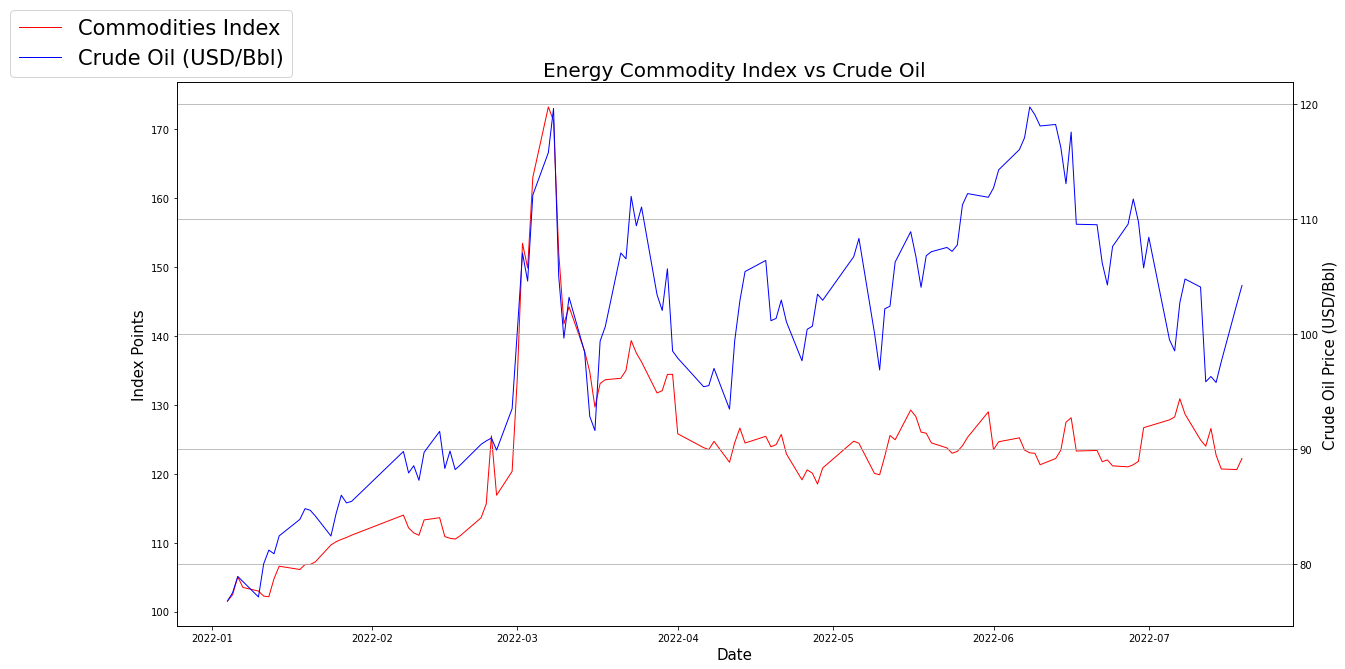

In [46]:
fig, axis_1 = plt.subplots(figsize=(20, 10))
axis_2 = axis_1.twinx()

axis_1.plot(commodity_index.index.tolist(), commodity_index['index_value'].values.tolist(), marker='', color='red', linewidth=1, label='Commodities Index')
axis_2.plot(df.index.tolist(), df['Crude Oil (CL1:COM)'].values.tolist(), marker='', color='blue', linewidth=1, label='Crude Oil (USD/Bbl)')

# setting axis labels
axis_1.set_xlabel('Date')
axis_1.set_ylabel('Index Points', fontsize=15)
axis_2.set_ylabel('Crude Oil Price (USD/Bbl)', fontsize=15)

fig.legend(
    loc='upper left',
    fontsize=21,
    ncol=1
    )
plt.grid(True)

plt.title('Energy Commodity Index vs Crude Oil', size=20)
plt.show()